## Prophet Water Level Outliers

Use water level measurements of groundwater available from IntellusNM.com to identify outliers, trend, seasonality, and upset events. 
Review the groundwater wells discussed in the Los Alamos Reported article from April 6, 2023, "Los Alamos County Utilities Manager, Board Concerned About Disposition of LANL Hexavalent Chromium Plume, https://losalamosreporter.com/2023/04/06/los-alamos-county-utilities-manager-board-concerned-about-disposition-of-lanl-hexavalent-chromium-plume/

### Data Sources
Data provided are from the publically owned IntellusNM.com database containing environmental monitoring measurements.  Water Levels are downloaded from IntellusNM.com using the web interface:
- Use your web browser to navigate to https://intellusnm.com
- Click on the Search Data > Quick Search Menu Item to step through filters to retrieve water level measurements.
- Select the data provider(s): Los Alamos National Laboratory, then click Continue.
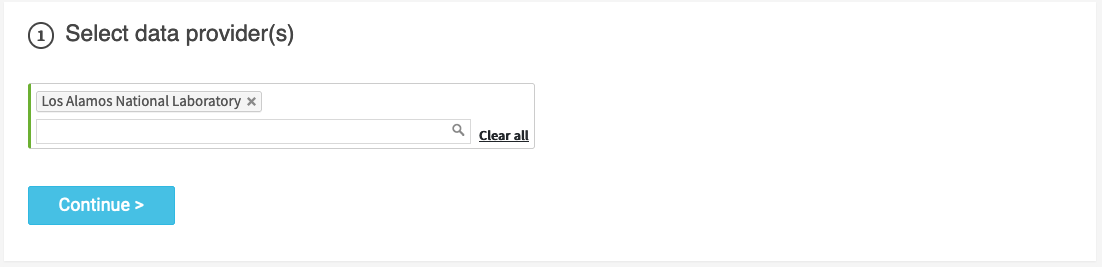  

  - Select the type of data: Groundwater levels, then click Continue.  
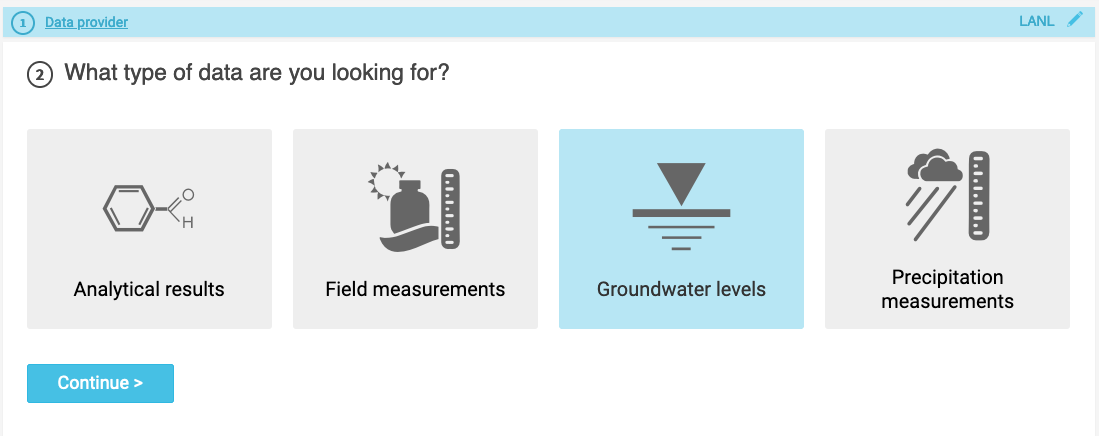

  - Select the date range you want to search: 01/01/2000 to 02/19/2024, then click Continue.  
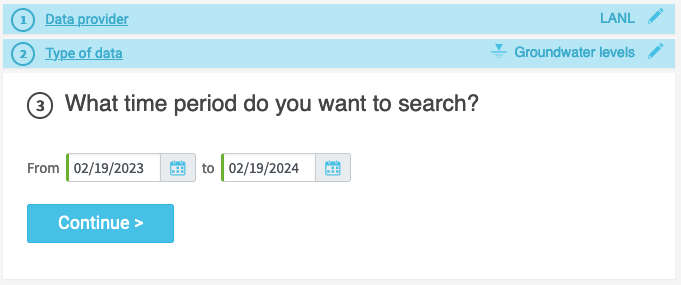

  - Click the radio button to "Enter or upload a list of locations, groups, or samples".
  - Use the Select a file: Browse button to enter the file Wells_for_review.txt, then click Check my locations...
  - Move the available locations from the left to the right selection box
  - Save changes
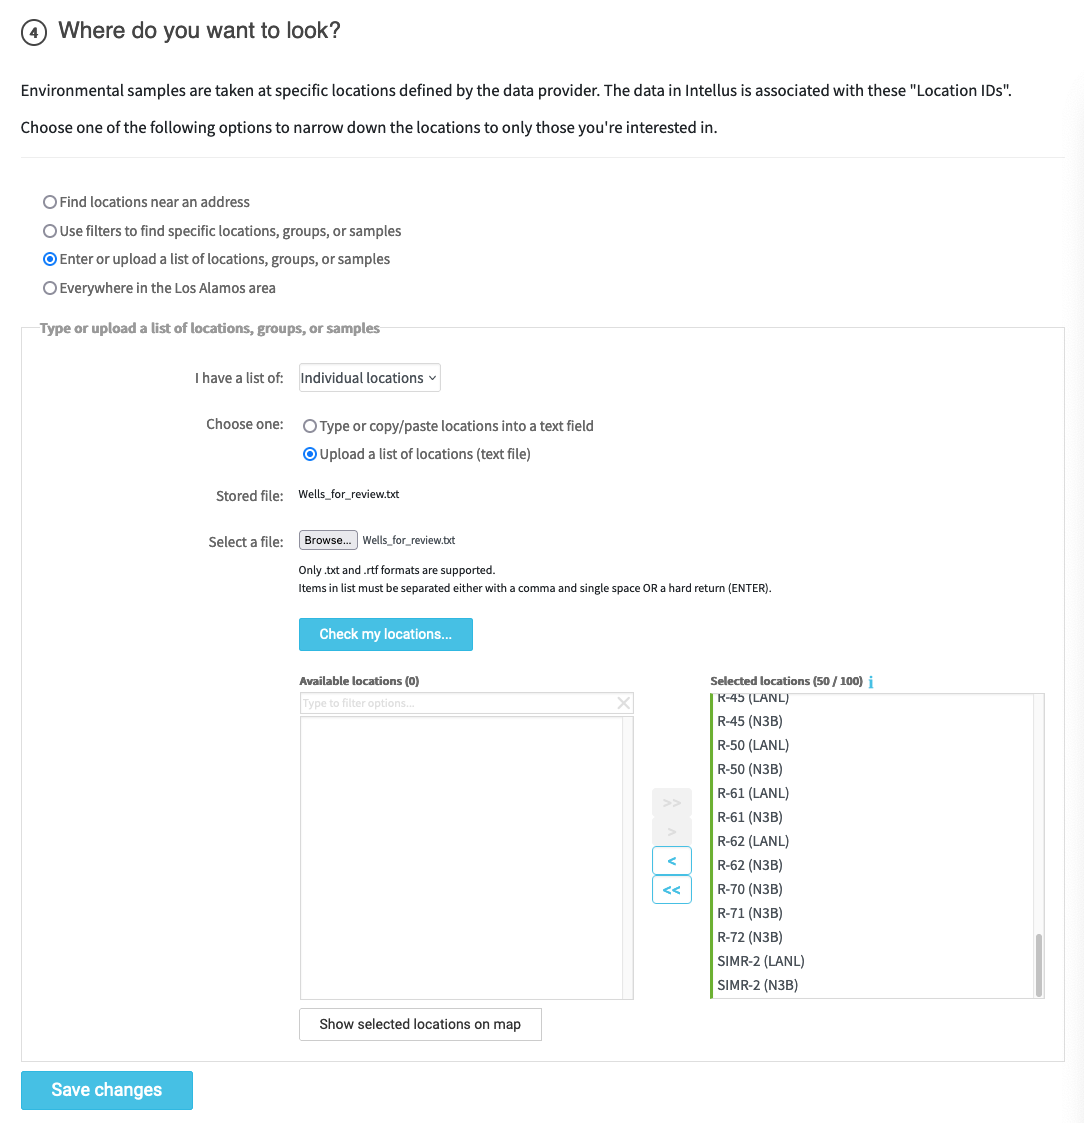

  - Highlight and move 2 fields from the "Available Fields" column to the "Selected Fields" column, then click Continue
    - "Groundwater Level Data Quality Code", and 
    - "Groundwater Level Validation Reason Code"  
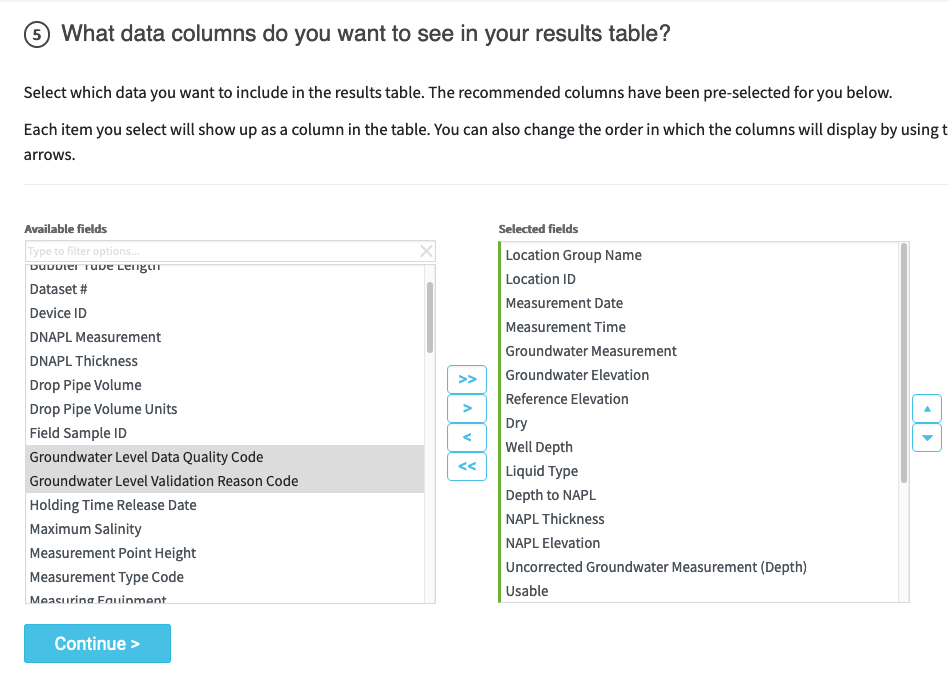

  - A grid of over 500,000 results is displayed.
  - Use the download results button at the top of the grid or the download button at the bottom of the grid to retrieve records to a CSV file.
  - Save the records to the  to a zipped CSV file.  
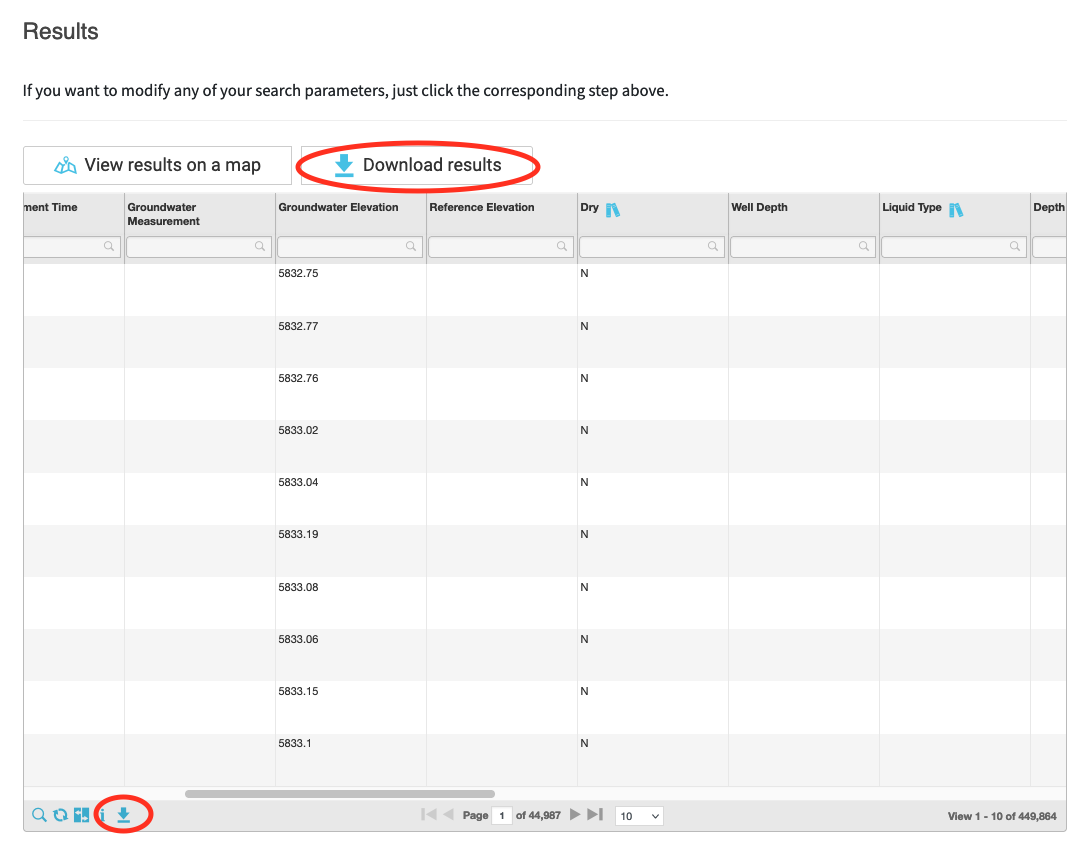


### Changes
- 02-19-2024 : Started project

In [2]:
import pandas as pd
from pathlib import Path
from datetime import datetime

/var/folders/cw/0j2ns2q56n7_rxycqh03plxm0000gn/T/ipykernel_64414/2713194104.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


### File Locations

In [31]:
today = datetime.today()
in_file = Path.cwd() / "data" / "external" / "Water_Levels_02_19_2024.csv"
summary_file = Path.cwd() / "data" / "processed" / f"summary_{today:%b-%d-%Y}.pkl"

In [11]:
df = pd.read_csv(in_file)

### Column Cleanup

- Remove all leading and trailing spaces
- Rename the columns for consistency.

In [12]:
# https://stackoverflow.com/questions/30763351/removing-space-in-dataframe-python
df.columns = [x.strip() for x in df.columns]
df.columns

Index(['Site ID', 'Location ID', 'Measurement Date', 'Measurement Time',
       'Groundwater Measurement', 'Groundwater Elevation',
       'Groundwater Level Comments', 'Groundwater Level Data Quality Code',
       'Groundwater Level Validation Reason Code'],
      dtype='object')

In [20]:
df_subset_variables = df[['Site ID', 'Location ID', 'Measurement Date', 'Measurement Time',
       'Groundwater Measurement', 'Groundwater Elevation',
       'Groundwater Level Comments', 'Groundwater Level Data Quality Code',
       'Groundwater Level Validation Reason Code']]

### Clean Up Data Types

In [30]:
df_subset_variables['Measurement Date Time'] = pd.to_datetime(df_subset_variables['Measurement Date'] + ' ' + df_subset_variables['Measurement Time'])
df_clean = df_subset_variables.drop(columns=['Measurement Date','Measurement Time'])
df_clean = df_clean[['Site ID', 'Location ID',  'Measurement Date Time','Groundwater Measurement',
       'Groundwater Elevation', 'Groundwater Level Comments',
       'Groundwater Level Data Quality Code',
       'Groundwater Level Validation Reason Code']]
df_clean.head()

,Site ID,Location ID,Measurement Date Time,Groundwater Measurement,Groundwater Elevation,Groundwater Level Comments,Groundwater Level Data Quality Code,Groundwater Level Validation Reason Code
0,N3B,CrEX-1,2017-01-14 00:01:00,NaN,5821.47,NaN,NaN,NaN
1,N3B,CrEX-1,2017-01-13 00:01:00,NaN,5821.64,NaN,NaN,NaN
2,N3B,CrEX-1,2017-01-12 00:01:00,NaN,5821.76,NaN,NaN,NaN
3,N3B,CrEX-1,2017-01-11 00:01:00,NaN,5821.92,NaN,NaN,NaN
4,N3B,CrEX-1,2017-01-10 00:01:00,NaN,5821.87,NaN,NaN,NaN


### Data Manipulation

### Save output file into processed directory

Save a file in the processed directory that is cleaned properly. It will be read in and used later for further analysis.

Other options besides pickle include:
- feather
- msgpack
- parquet

In [32]:
df_clean.to_pickle(summary_file)